# INMERSION DE DATOS CON PYTHON

##Desafios

1. Analizar los datos de las distribuciones e identificar si hay algun valor o registros que no deben considerar para el modelo.

2. Investigar que es y como crear un mapa de calor para analizar la correlacion de las variables.

3. Crear una conclucion para cada uno de los graficos del histograma. Mirar los graficos y extraer concluciones.

In [ ]:
# Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import warnings

# Montar Google Drive
drive.mount('/content/drive')
warnings.filterwarnings("ignore")

# Cargar los datos
file_path = '/content/drive/MyDrive/Colab Notebooks/german_credit.csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas del dataframe
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [ ]:
# Información básica del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [ ]:
# Estadísticas descriptivas
data.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [ ]:
# Revisión de valores nulos
data.isnull().sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

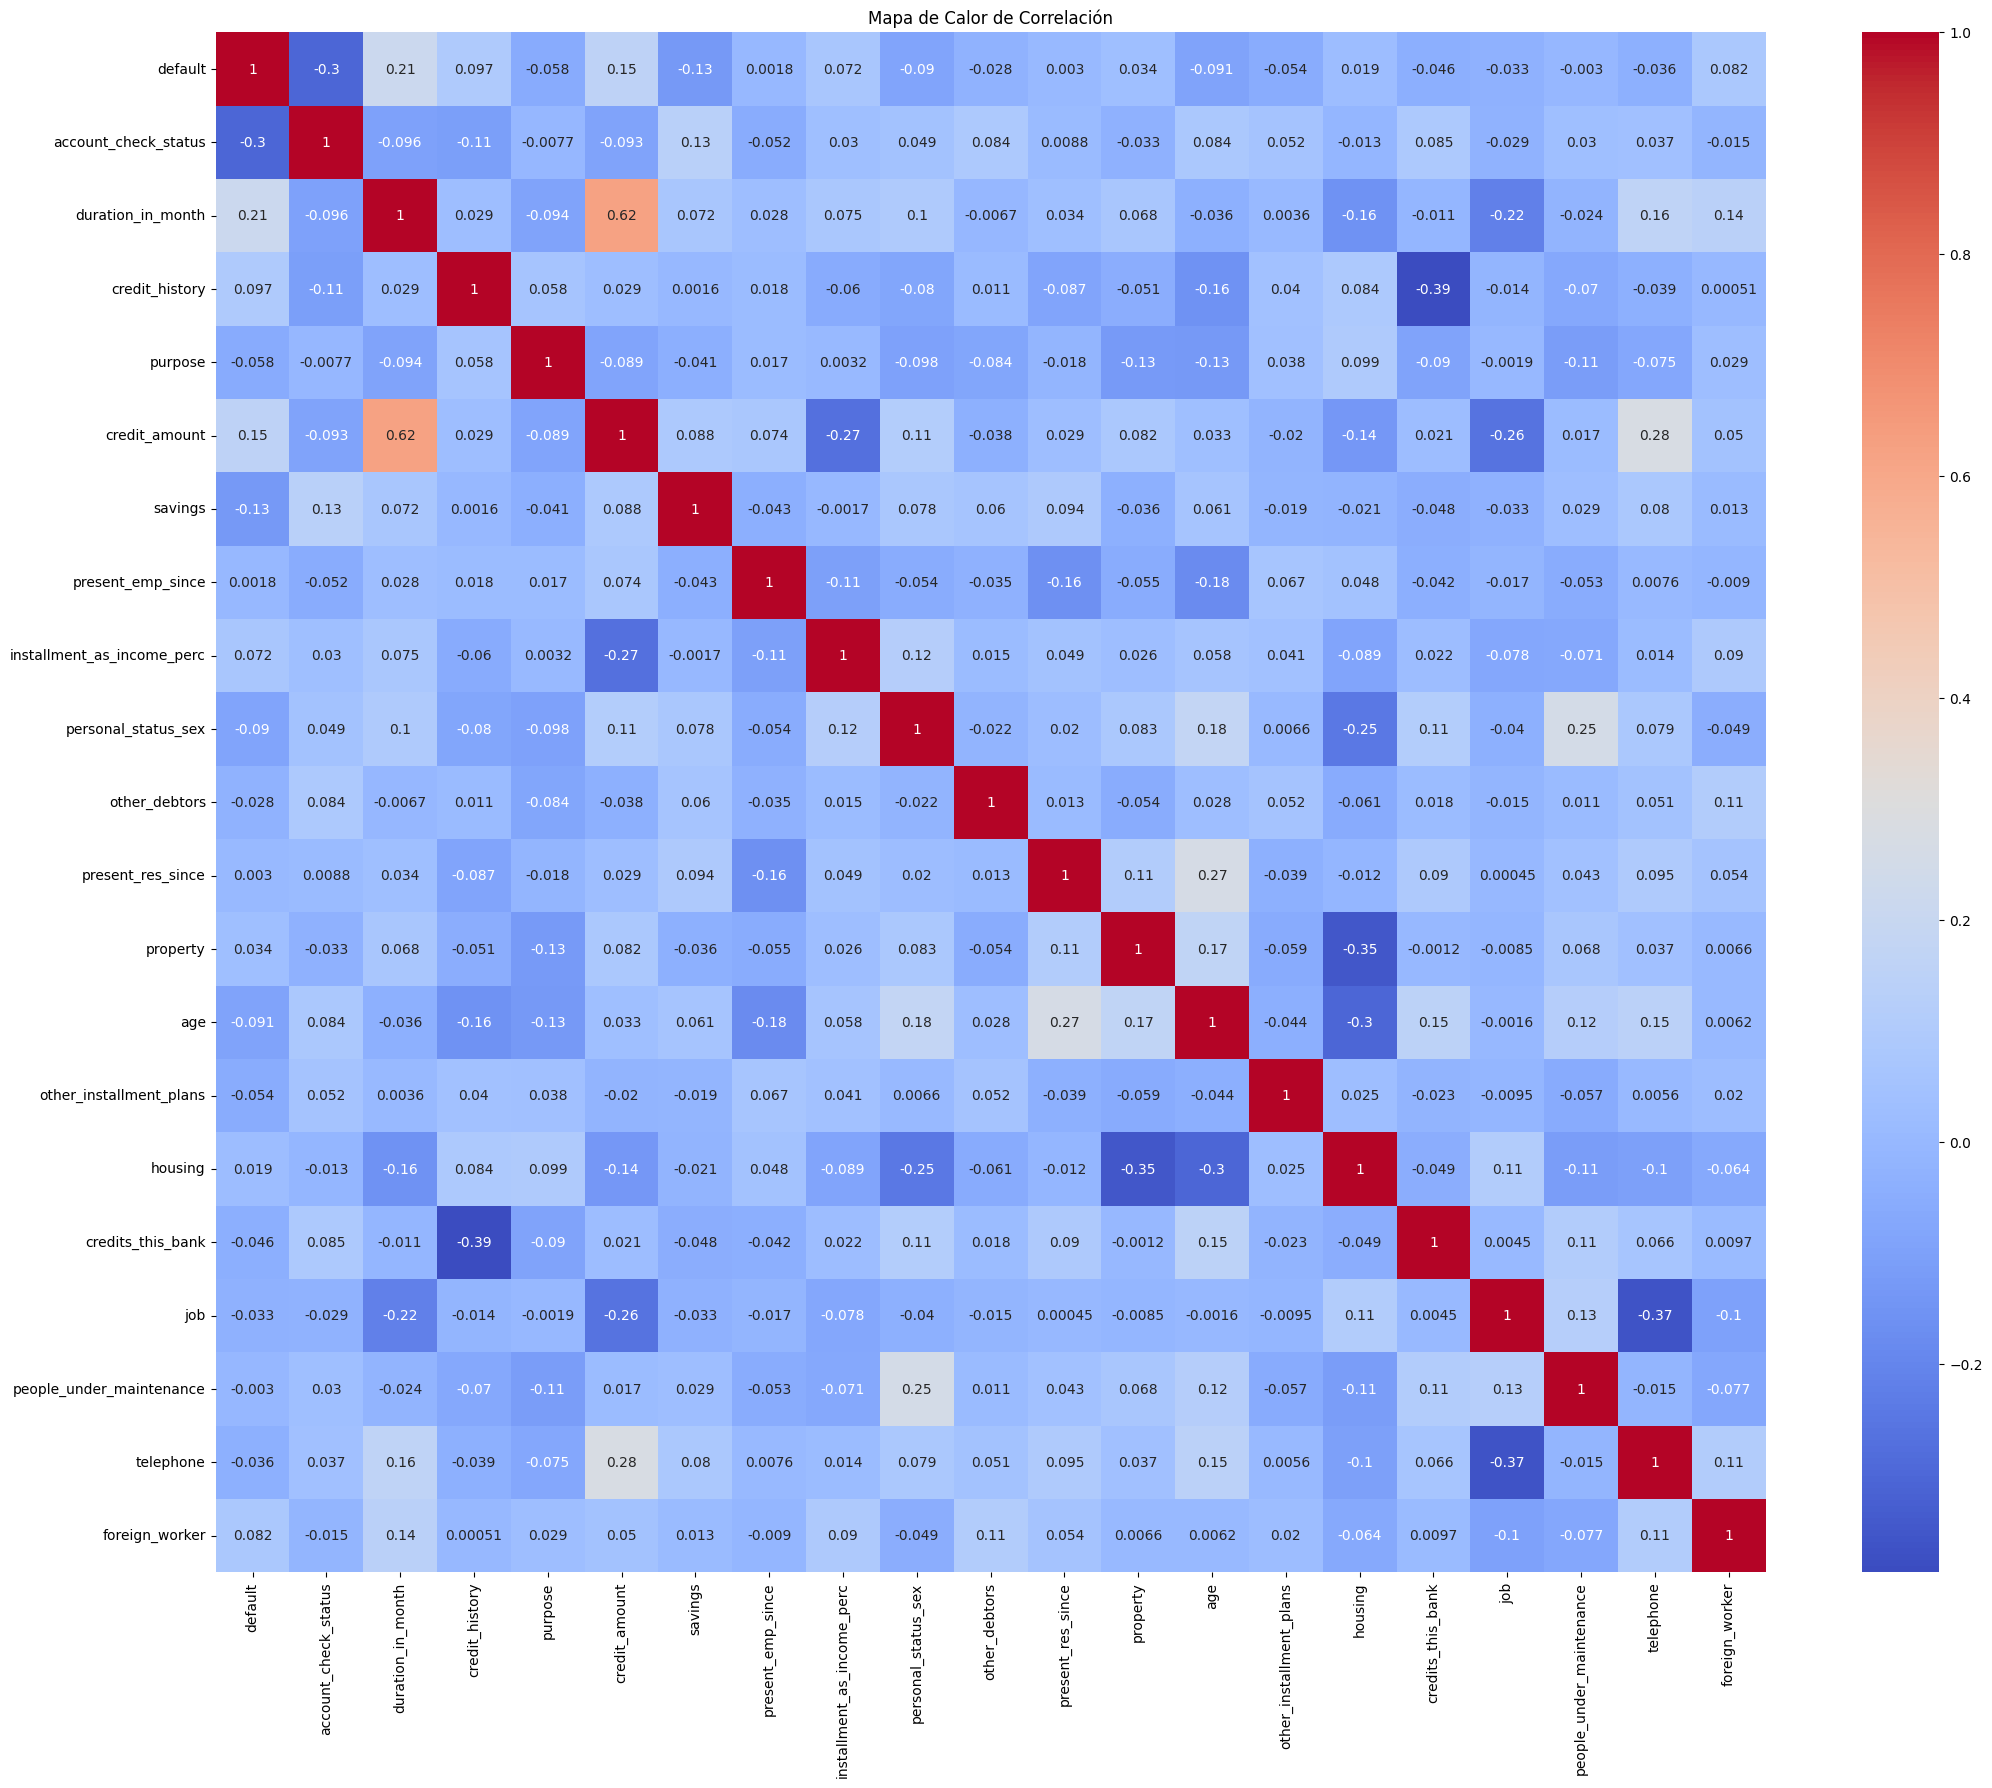

In [ ]:
# prompt: crear un mapa de calor para analizar la correlacion de las variables

import matplotlib.pyplot as plt
# Crear un mapa de calor
plt.figure(figsize=(25, 20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()


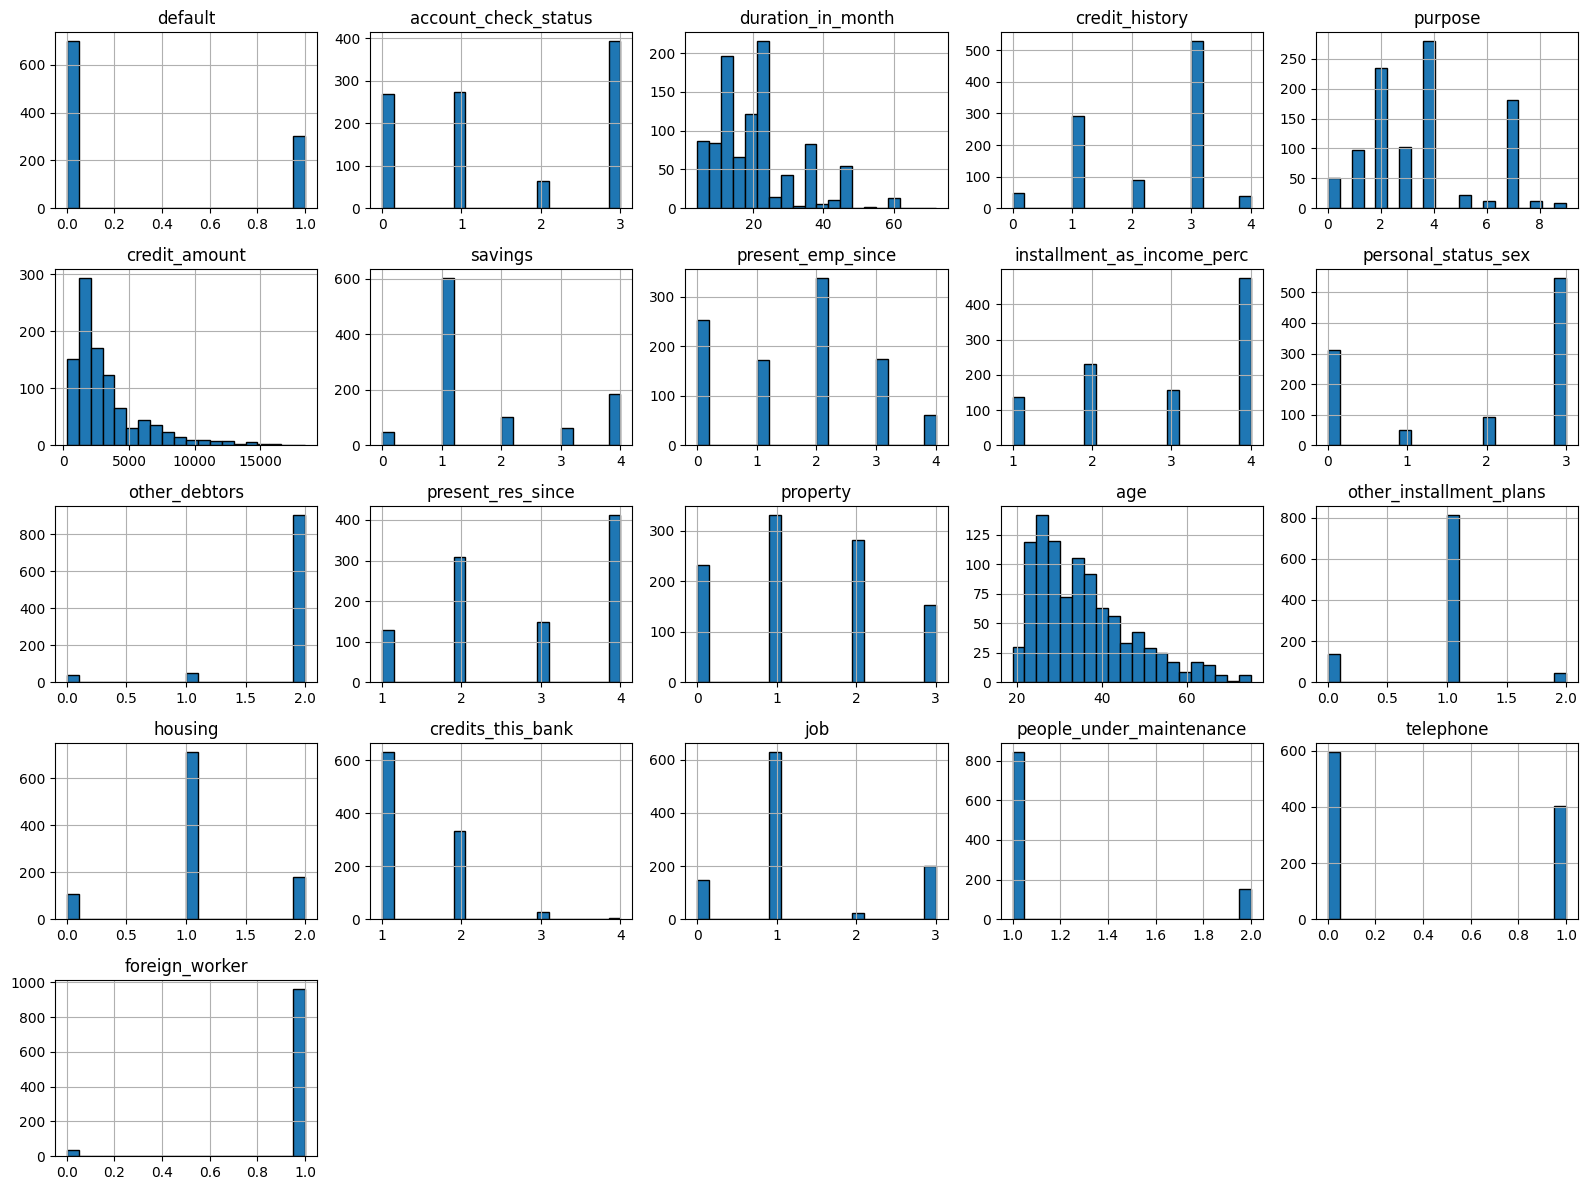

In [ ]:
# Crear histogramas para cada columna numérica
data.hist(figsize=(16, 12), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

1. default: La mayoría de los clientes no incumplen con sus
pagos (valor 0).
2. account_check_status: Predomina el valor 1, seguido por el 3.
3. duration_in_month: La duración de los créditos tiende a ser más corta, con un pico alrededor de los 12 meses.
4. credit_history: La mayoría de los clientes tiene un buen historial crediticio (valores 2 y 3).
5. purpose: Los principales propósitos del crédito son para bienes de consumo y automóviles.
6. credit_amount: La mayoría de los créditos se sitúan por debajo de los 5000 unidades monetarias.
7. savings: La mayoría de los clientes tiene ahorros bajos o nulos.
8. present_emp_since: Muchos clientes han estado empleados durante más de un año.
9. installment_as_income_perc: La mayoría de los créditos tiene una cuota que representa alrededor del 2-3% del ingreso.
10. personal_status_sex: Predomina el estado civil 1 (solteros).
11. age: La mayoría de los clientes tienen entre 20 y 40 años.
12. credits_this_bank: La mayoría de los clientes tiene solo un crédito en el banco.
13. foreign_worker: La mayoría de los clientes no son trabajadores extranjeros.

